### Two-week Meteorological Data Analysis in Muntinlupa using a DHT11 sensor

Below are the codes used to proccess the data collected through a DHT11 sensor stationed in Muntinlupa for a period of 2 weeks.

In [5]:
# Import necessary libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

The data collected from the DHT11 sensor contains the time, humidity, and temperature. Using a data stucture to hold these components is a good way to manage the data. The data is extracted from a .csv file, downloaded from google sheets. 

In [6]:
# Create a data structure to store the data
class Datapoint:
    date = datetime(2023, 10, 19, 12, 0, 0, 0)
    humi = -1
    temp = -1

    def __init__(self, _date, _humi, _temp):
        self.date = _date
        self.humi = _humi
        self.temp = _temp

# Declaring list/storage of data
datapoints = []
date_format = '%m/%d/%Y_%H:%M:%S'

# Import data from csv file
with open("DSP Project Midterms - Sheet1.csv", 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        dp_date = Datapoint(datetime.strptime(row[0],date_format), float(row[1]), float(row[2]))
        datapoints.append(dp_date)

print("Total data collected:", len(datapoints))
print("Sample data:")
print("\tDate & Time:", datapoints[0].date, "\n\tHumidity:", datapoints[0].humi, "\n\tTemperature:", datapoints[0].temp)

Total data collected: 834
Sample data:
	Date & Time: 2023-10-19 23:52:42 
	Humidity: 70.9 
	Temperature: 31.2


In [7]:
start = 0
count = len(datapoints)
humi_ave = temp_ave = interval_ave = 0

# Proccessing data (1)
for i in range(start+1, count):
    humi_ave += datapoints[i-1].humi
    temp_ave += datapoints[i-1].temp

In [8]:
# Calculating averages
humi_ave /= (count - start)
temp_ave /= (count - start)

inserted_data = datapoints
collection_period = datapoints[len(datapoints)-1].date - datapoints[0].date

print()
print("len:", len(datapoints))
print("Ave_humi:", humi_ave, "Ave_temp:", temp_ave)


len: 834
Ave_humi: 65.63573141486825 Ave_temp: 32.575539568345434


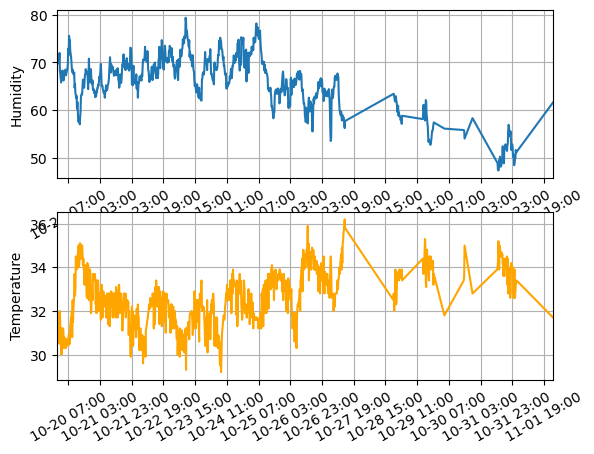

In [9]:
# Defining the range of the graph
interval = len(inserted_data)-1
date_first = inserted_data[0].date
date_last = inserted_data[interval].date

# Storing our data into lists
humi = [ data.humi for data in inserted_data ]
temp = [ data.temp for data in inserted_data ]

date_holder = [ date.date for date in inserted_data ]
holder = inserted_data[0].date.strftime("%m/%d_%H:%M")

# Storing the dates
for i in range(interval):
    if i % (interval//10) == 0:
        holder = inserted_data[i].date.strftime("%M/%d_%H:%M")

# Plotting the bumidity
plt.subplot(211)
plt.plot(date_holder, humi)
plt.grid()

## Format the date into months & days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# Change the tick interval
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=20))
# Puts x-axis labels on an angle
plt.gca().xaxis.set_tick_params(rotation = 30)
# Changes x-axis range
plt.gca().set_xbound(date_first, date_last)
plt.ylabel("Humidity")

plt.subplot(212)
plt.plot(date_holder, temp, color="orange")
plt.grid()

## Format the date into months & days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# Change the tick interval
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=20))
# Puts x-axis labels on an angle
plt.gca().xaxis.set_tick_params(rotation = 30)
# Changes x-axis range
plt.gca().set_xbound(date_first, date_last)
plt.ylabel("Temperature")

plt.show()